Link to competition: https://www.kaggle.com/c/fungi-challenge-fgvc-2018/overview

# Preparations

In [58]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [59]:
from fastai.vision import * 
import json
from os import listdir
from fungi_functions import *

In [60]:
np.random.seed(1991)

How many training examples are processed in one iteration. If you face memory errors, decrease the batch size

In [61]:

batch_size = 64

In [62]:
listdir("/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/models")

['resnet34_t2_128_stage2.pth',
 'tmp.pth',
 'resnet34_t1_128_stage1.pth',
 '.ipynb_checkpoints',
 'resnet34_t2_128_stage1.pth']

In [63]:
model_name = "resnet34_t1_128_stage1"

In [64]:
model, tfms, t, image_size = load_variables(model_name)

In [65]:
print(model)
print(tfms)
print(t)
print(image_size)

<function resnet34 at 0x7f8e4ba5a710>
None
t1
128


# Loading Data

In [66]:
data_path_str = "data"
train_path_str = "train"
test_path_str = "test"

In [67]:
data = ImageDataBunch.from_folder(
    path = data_path_str,
    train = train_path_str,
    test = test_path_str,
    size = image_size,
    ds_tfms = tfms,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

# Finetuning

In [68]:
top_k_accuracy_3 = partial(top_k_accuracy, k=3)

In [69]:
learner = cnn_learner(data, model, metrics=top_k_accuracy_3)

In [70]:
learner.load(model_name)

Learner(data=ImageDataBunch;

Train: LabelList (71808 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus
Path: data;

Valid: LabelList (17952 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
16111_Leccinum_scabrum,14062_Fomes_fomentarius,14861_Gliophorus_psittacinus,11903_Coniophora_puteana,18776_Piptoporus_betulinus
Path: data;

Test: LabelList (9758 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True

In [71]:
learner.unfreeze()

epoch,train_loss,valid_loss,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


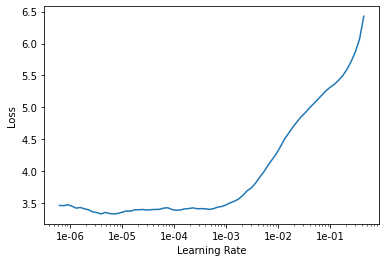

In [72]:
learner.lr_find()
learner.recorder.plot()

In [73]:
lr = slice(1e-5, 1e-4)

In [74]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,top_k_accuracy,time
0,3.559869,3.485862,0.467803,06:08
1,3.924891,3.895346,0.389706,06:08
2,3.927103,3.894681,0.390653,06:10
3,3.522421,3.575521,0.441901,06:10
4,3.042089,3.344474,0.488302,06:16
5,2.433277,3.181463,0.517603,06:21
6,1.801902,3.139989,0.543059,06:14
7,1.161693,3.146790,0.549855,06:11
8,0.777182,3.191131,0.552640,06:11
9,0.604924,3.192425,0.553643,06:11


In [75]:
t

't1'

In [76]:
file_name = "_".join([model.__name__, t ,str(image_size), "stage2"]);file_name

'resnet34_t1_128_stage2'

In [77]:
learner.save(file_name)